In [1]:
from simulator import Sim
from strategy1 import Strategy
from strategy1 import *
from get_info import get_pnl
from load_data import load_md_from_file


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
PATH_TO_BTC = r'C:\Users\walkr\Documents\HFT\HFT\simulator\data\BTC'
PATH_TO_ETH = r'C:\Users\walkr\Documents\HFT\HFT\simulator\data\ETH'
btc = pd.read_csv(PATH_TO_BTC+"\lobs.csv", nrows=10_000)
print(btc)

               receive_ts          exchange_ts  \
0     1655942402250125991  1655942402249000000   
1     1655942402657844605  1655942402655000000   
2     1655942403346968722  1655942403346000000   
3     1655942404080791047  1655942404080000000   
4     1655942404452706766  1655942404452000000   
...                   ...                  ...   
9995  1655942787994868234  1655942787994000000   
9996  1655942788027614291  1655942788027000000   
9997  1655942788061009383  1655942788060000000   
9998  1655942788092855222  1655942788092000000   
9999  1655942788128960171  1655942788128000000   

      btcusdt:Binance:LinearPerpetual_ask_price_0  \
0                                         19977.5   
1                                         19977.5   
2                                         19977.5   
3                                         19977.5   
4                                         19977.5   
...                                           ...   
9995                        

In [3]:
PATH_TO_BTC = r'C:\Users\walkr\Documents\HFT\HFT\simulator\data\BTC\\'
PATH_TO_ETH = r'C:\Users\walkr\Documents\HFT\HFT\simulator\data\ETH\\'

NROWS = 200_000

md_btc = load_md_from_file(path=PATH_TO_BTC, nrows = NROWS)
md_eth = load_md_from_file(path=PATH_TO_ETH, nrows = NROWS)
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

sim_btc = Sim(md_btc, latency, md_latency)
sim_eth = Sim(md_eth, latency, md_latency)

delay = pd.Timedelta(0.1, 's').delta
hold_time = pd.Timedelta(10, 's').delta

In [4]:
sigma_btc = 28.267183019829968
sigma_eth = 2.5749407232019585
rho = 0.82513964

gamma = 7
A1 = 1
k1 = 2
big_delta_btc = 1
ksi1 = 1.5
A2 = 1
k2 = 10
big_delta_eth = 1
ksi2 = 1.5

ksi2 = ksi1
ksi = ksi2
A2 = A1
A = A2

E = E_f(sigma_btc, sigma_eth, rho)
print(E)
big_gamma = big_gamma_f(E, A1, k1, big_delta_btc, ksi, A2, k2, big_delta_eth, ksi)
print(big_gamma)

intensity_btc = 7
intensity_eth = 5

A = 1
k = 1

[[28.26718302  0.82513964]
 [ 0.82513964  2.57494072]]
[[7.21591498 0.12000859]
 [0.12000859 0.86576391]]


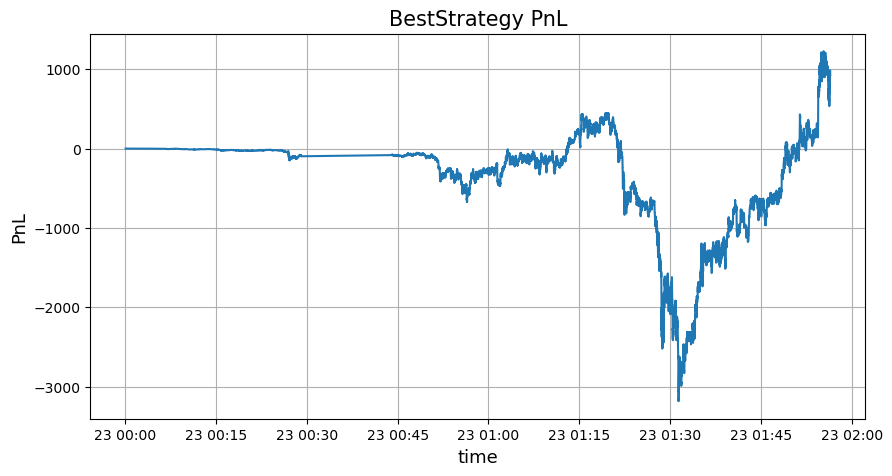

In [5]:
strategy = Strategy(delay, hold_time,
                        gamma, big_gamma, ksi, intensity_btc, intensity_eth,
                        big_delta_btc, big_delta_eth, A, k
                        )
trades_list_btc, md_list_btc, updates_list_btc, all_orders_btc, trades_list_eth, md_list_eth, updates_list_eth, all_orders_eth = strategy.run(sim_btc, sim_eth)


df = get_pnl(updates_list_btc)

dt = pd.to_datetime(df.receive_ts)

plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()


<AxesSubplot: >

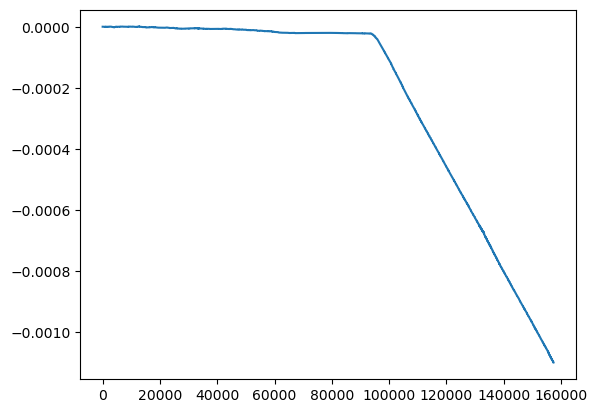

In [6]:
(df["BTC"]/df["mid_price"]).plot()

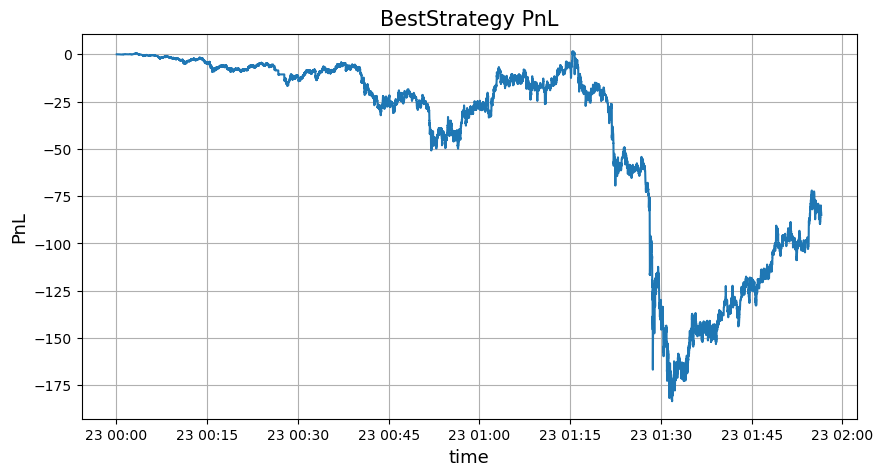

In [7]:
df = get_pnl(updates_list_eth)

dt = pd.to_datetime(df.receive_ts)

plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()

<AxesSubplot: >

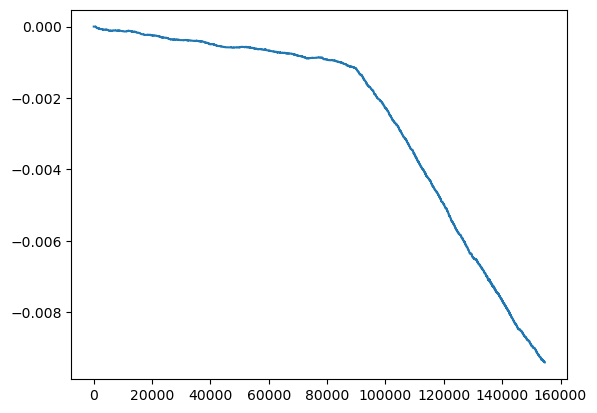

In [8]:
(df["BTC"]/df["mid_price"]).plot()